In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as ptly
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
%matplotlib inline
init_notebook_mode(connected=True)
cf.go_offline()

## Visualisation

In [68]:
df = pd.read_csv('USA_Housing.csv')

In [69]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 254.0+ KB


In [71]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [72]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

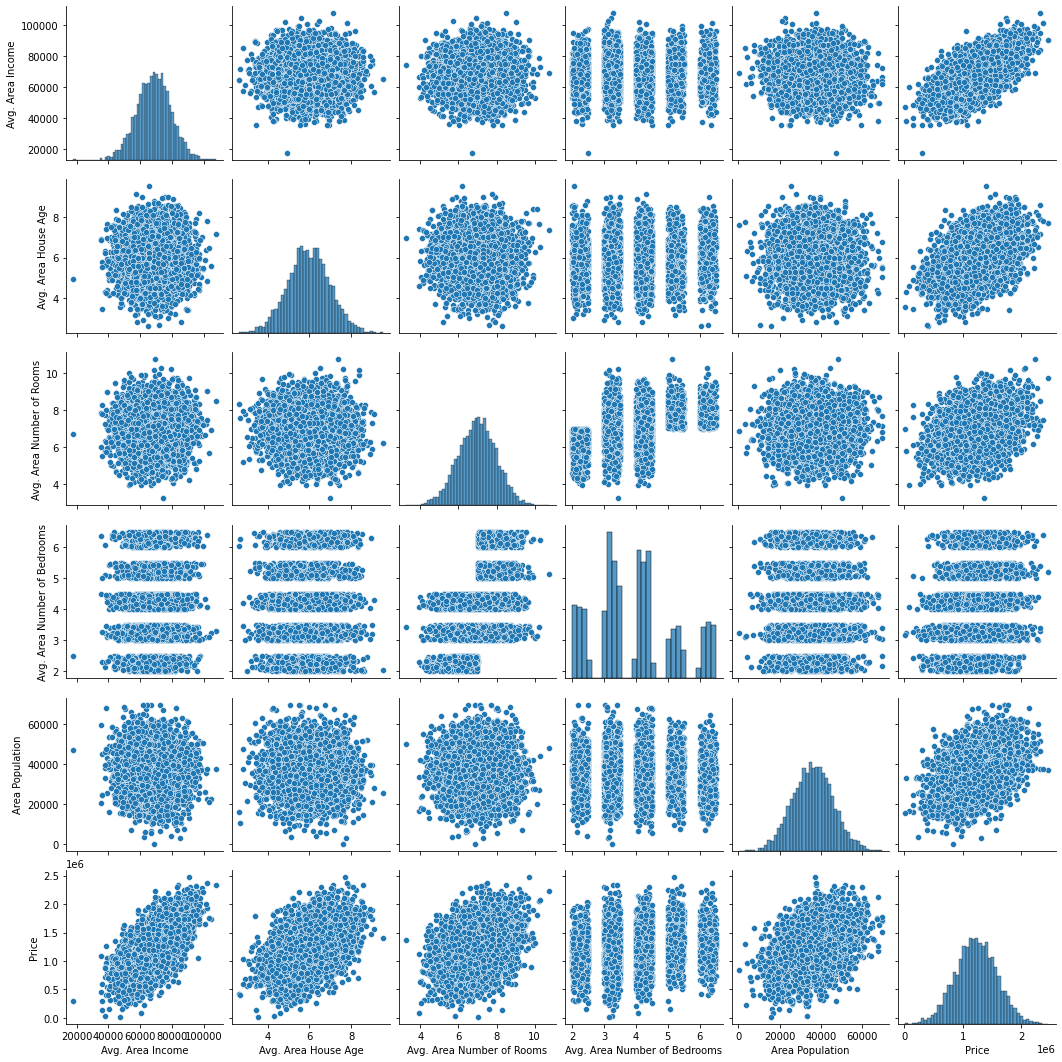

In [73]:
sns.pairplot(df)

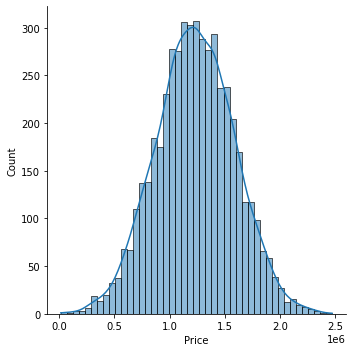

In [74]:
sns.displot(df['Price'],kde=True)

In [78]:
df['Price'].iplot(kind='bar')

<AxesSubplot:>

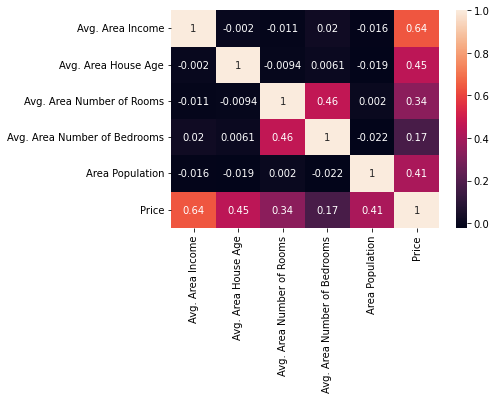

In [80]:
sns.heatmap(df.corr(),annot=True)

## Linear Regression

In [93]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [95]:
#create LinearRegression object
lm = LinearRegression()

In [96]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [110]:
# Features
X = df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population']]

In [111]:
# Target variable or what we want to predict
y = df['Price']

In [112]:
# training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [113]:
#Train the model
lm.fit(X_train,y_train)

LinearRegression()

In [114]:
# Evaluate the model
print(lm.intercept_)

-2640159.7968516257


In [115]:
# coefficients
lm.coef_

array([2.15282755e+01, 1.64883282e+05, 1.22368678e+05, 2.23380186e+03,
       1.51504200e+01])

In [119]:
#coefficients of each features
cdf=pd.DataFrame(lm.coef_,X.columns,columns=['coef'])

In [118]:
cdf

,coef
Avg. Area Income,21.528276
Avg. Area House Age,164883.282027
Avg. Area Number of Rooms,122368.678027
Avg. Area Number of Bedrooms,2233.801864
Area Population,15.150420


## Prediction

In [120]:
prediction = lm.predict(X_test)

In [121]:
prediction

array([1260960.70567625,  827588.75560359, 1742421.24254323, ...,
        372191.40626965, 1365217.15140894, 1914519.54178805])

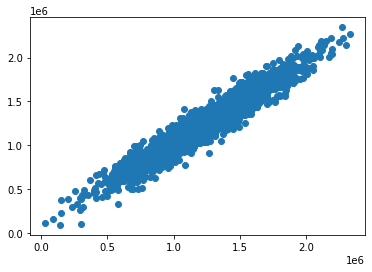

In [124]:
plt.scatter(y_test,prediction)

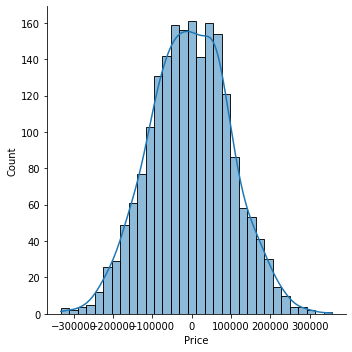

In [126]:
sns.displot((y_test-prediction),kde=True)

## Evaluation Matix

In [131]:
from sklearn import metrics

In [133]:
# Mean Absolute Error
metrics.mean_absolute_error(y_test,prediction)

82288.22251914961

In [134]:
# Mean Squared Error
metrics.mean_squared_error(y_test,prediction)

10460958907.209692

In [135]:
# Root Mean Squared Error
np.sqrt(metrics.mean_squared_error(y_test,prediction))

102278.82922291246